Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [ ]:
X, y, _ = datasets.make_regression(n_samples=1000, n_features=5, n_targets=1,noise=10, coef=True, random_state=1)

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
def sgd(X, y, batch_size, lr = 0.01, iter = 1000, max_er = 1e-5):
    
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [calc_mse(y, np.dot(weights, X.T))], [weights]
    n_batches = len(y) // batch_size

    if len(y) % batch_size:
        n_batches += 1

    for n_iter in range(iter):
        for b in range(n_batches):
            x_batch = X[b*batch_size:(b+1)*batch_size]
            y_batch = y[b*batch_size:(b+1)*batch_size]

            y_pred = np.dot(weights, x_batch.T)
            current_error = calc_mse(y_batch, y_pred)
            weights -= 2*lr*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)

        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < max_er:
            break
        
    return weights, weights_history, errors_history

In [ ]:
w_res, _, err_list_sgd = sgd(X, y, iter=100, lr=1e-2, batch_size=1)
print(w_res)
w_res, _, err_list_mgd_5 = sgd(X, y, iter=100, lr=1e-2, batch_size=5)
print(w_res)
w_res, _, err_list_mgd_10 = sgd(X, y, iter=100, lr=1e-2, batch_size=10)
print(w_res)
w_res, _, err_list_mgd_20 = sgd(X, y, iter=100, lr=1e-2, batch_size=20)
print(w_res)
w_res, _, err_list_mgd_50 = sgd(X, y, iter=100, lr=1e-2, batch_size=50)
print(w_res)
w_res, _, err_list_gd = sgd(X, y, iter=100, lr=1e-2, batch_size=1000)
print(w_res)

[72.92137995 10.53630365  5.03804127 32.20842858 30.37064484]
[72.4119232   8.92971215  6.40884248 32.68357756 30.9791125 ]
[72.46442575  8.65319974  6.65979394 32.86793491 31.09151552]
[72.5350276   8.53169329  6.77174672 32.92752344 31.15933651]
[72.58897498  8.47159478  6.82535368 32.93953977 31.2061684 ]
[61.26825871  6.51639764  6.16987854 29.38509291 26.96320542]


(0.0, 40.0)

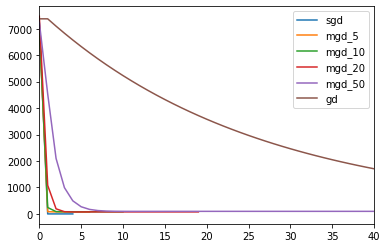

In [ ]:
plt.plot(err_list_sgd, label = 'sgd')
plt.plot(err_list_mgd_5, label = 'mgd_5')
plt.plot(err_list_mgd_10, label = 'mgd_10')
plt.plot(err_list_mgd_20, label = 'mgd_20')
plt.plot(err_list_mgd_50, label = 'mgd_50')
plt.plot(err_list_gd, label = 'gd')
plt.legend()
plt.xlim(0, 40)

# Выводы по первому заданию
SGD сходитcя быстрее всего. Дальше, всё зависит от размера батча. Чем больше батч, тем быстрее сходимость. 

Модифицировать решение первого задания путем добавления $𝐿_2$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [ ]:
def sgd_l2(X, y, batch_size, lr = 0.01, iter = 1000, max_er = 1e-5, l = 0.01):
    
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [calc_mse(y, np.dot(weights, X.T))], [weights]
    n_batches = len(y) // batch_size

    if len(y) % batch_size:
        n_batches += 1

    for n_iter in range(iter):
        for b in range(n_batches):
            x_batch = X[b*batch_size:(b+1)*batch_size]
            y_batch = y[b*batch_size:(b+1)*batch_size]

            y_pred = np.dot(weights, x_batch.T)
            current_error = calc_mse(y_batch, y_pred)
            weights -= 2*lr*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred) + 2*l*weights
        errors_history.append(current_error)
        weights_history.append(weights)

        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < max_er:
            break
        
    return weights, weights_history, errors_history

In [ ]:
w_res, _, err_list_sgd = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=1)
print(w_res)
w_res, _, err_list_mgd_5 = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=5)
print(w_res)
w_res, _, err_list_mgd_10 = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=10)
print(w_res)
w_res, _, err_list_mgd_20 = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=20)
print(w_res)
w_res, _, err_list_mgd_50 = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=50)
print(w_res)
w_res, _, err_list_gd = sgd_l2(X, y, iter=100, lr=1e-2, batch_size=1000)
print(w_res)

[36.71261579  5.95185433  6.82493877 22.42856141 16.90788805]
[35.08420888  4.51112746  5.94593001 18.61008706 15.38889295]
[34.67791715  4.0248063   4.92863288 18.03786236 15.39588125]
[34.71352521  3.75033205  4.24631199 17.75180638 15.37878057]
[34.87036352  3.56505922  3.85514704 17.47800624 15.37459181]
[34.26291226  3.34793578  3.60635379 17.05892303 15.10596611]


(0.0, 40.0)

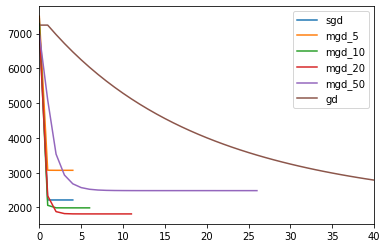

In [ ]:
plt.plot(err_list_sgd, label = 'sgd')
plt.plot(err_list_mgd_5, label = 'mgd_5')
plt.plot(err_list_mgd_10, label = 'mgd_10')
plt.plot(err_list_mgd_20, label = 'mgd_20')
plt.plot(err_list_mgd_50, label = 'mgd_50')
plt.plot(err_list_gd, label = 'gd')
plt.legend()
plt.xlim(0, 40)

# Выводы по 2 заданию

Всё сходится быстрее, но значение mse на котормо происходит "схождени" выше.